### Reconstruction of Image A with nnf obtained from Image A and Image B.

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from nnf import NNF
import metrics
from metrics import calculate_psnr, calculate_ssim, calculate_mse

In [ ]:
def reconstruct_img(img1, img2, patch_w=7, pm_iters=5):
    h, w = img1.shape[:2]
    output = img1.copy()
    patch_match = NNF(img1, img2, patch_w=patch_w, pm_iters=pm_iters)
    nnf, nnf_dist = patch_match.compute_nnf()

    for ay in range(h):
        for ax in range(w):
            by, bx = nnf[ay, ax]
            
            if not patch_match._in_border(ax, ay) and not patch_match._in_border(bx, by, patch_match.bw, patch_match.bh):

                output[ay - patch_w//2:ay + patch_w//2 + 1, ax - patch_w//2:ax + patch_w//2 + 1] = \
                    img2[by - patch_w//2:by + patch_w//2 + 1, bx - patch_w//2:bx + patch_w//2 + 1]
                

    return output, nnf, nnf_dist

In [ ]:
def reconstruct_img_average(img1, img2, patch_w=7, pm_iters=5):
    h, w = img1.shape[:2]
    output = np.zeros_like(img1, dtype=np.float32)
    count = np.zeros_like(img1, dtype=np.float32)
    
    patch_match = NNF(img1, img2, patch_w=patch_w, pm_iters=pm_iters)
    nnf, nnf_dist = patch_match.compute_nnf()
    
    for ay in range(h):
        for ax in range(w):
            by, bx = nnf[ay, ax]

            if not patch_match._in_border(ax, ay) and not patch_match._in_border(bx, by, patch_match.bw, patch_match.bh):
            
                output[ay - patch_w//2:ay + patch_w//2 + 1, ax - patch_w//2:ax + patch_w//2 + 1] += \
                    img2[by - patch_w//2:by + patch_w//2 + 1, bx - patch_w//2:bx + patch_w//2 + 1]
            
                count[ay - patch_w//2:ay + patch_w//2 + 1, ax - patch_w//2:ax + patch_w//2 + 1] += 1
    
    count[count == 0] = 1
    output /= count
        
    return output.astype(np.uint8), nnf, nnf_dist

In [30]:
def plot_reconstructed_images(img1, img2, recon):    
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    ax[0].imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
    ax[0].set_title('Image A')
    ax[0].axis('off')

    ax[1].imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
    ax[1].set_title('Image B')
    ax[1].axis('off')

    ax[2].imshow(cv2.cvtColor(recon, cv2.COLOR_BGR2RGB))
    ax[2].set_title('Reconstructed A using B and NNF(A to B)')
    ax[2].axis('off')

    plt.show()

In [36]:
a = cv2.imread('../../images/reconstruction/a.png')
b = cv2.imread('../../images/reconstruction/b.png')

In [37]:
recon_a, _, _ = reconstruct_img(a, b)

In [38]:
recon_a_using_avg, _, _ = reconstruct_img_average(a, b)

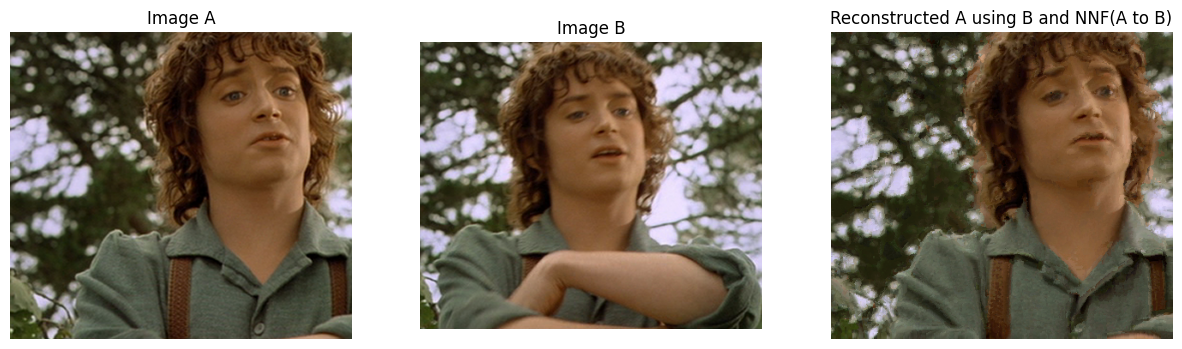

In [39]:
plot_reconstructed_images(a, b, recon_a)

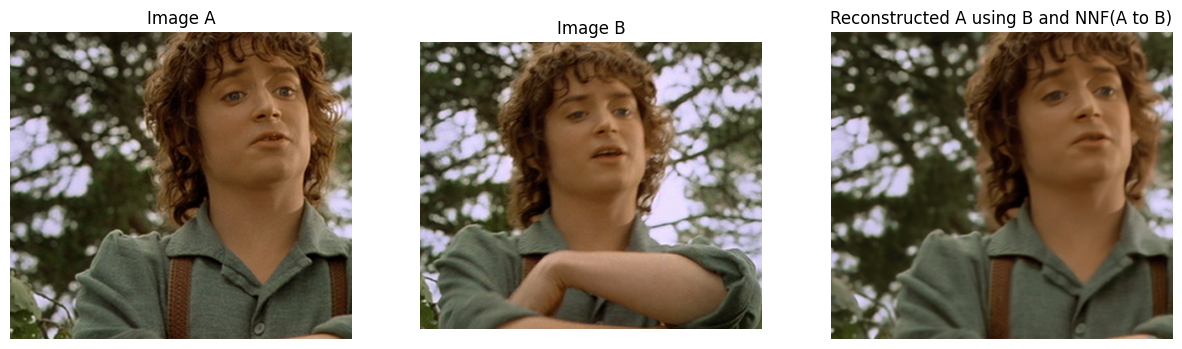

In [40]:
plot_reconstructed_images(a, b, recon_a_using_avg)

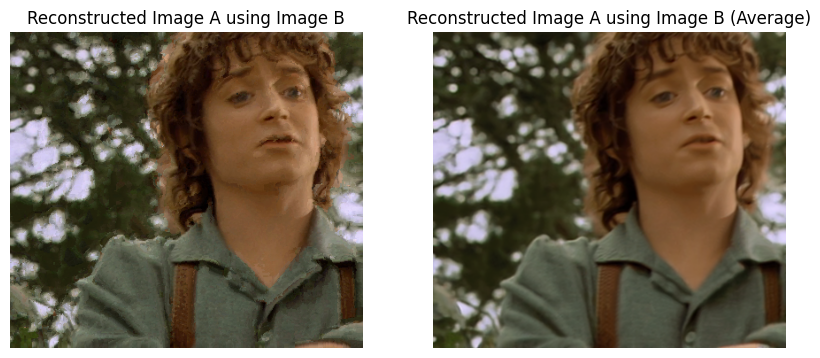

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(cv2.cvtColor(recon_a, cv2.COLOR_BGR2RGB))
ax[0].set_title('Reconstructed Image A using Image B')
ax[0].axis('off')

ax[1].imshow(cv2.cvtColor(recon_a_using_avg, cv2.COLOR_BGR2RGB))
ax[1].set_title('Reconstructed Image A using Image B (Average)')
ax[1].axis('off')

plt.show()

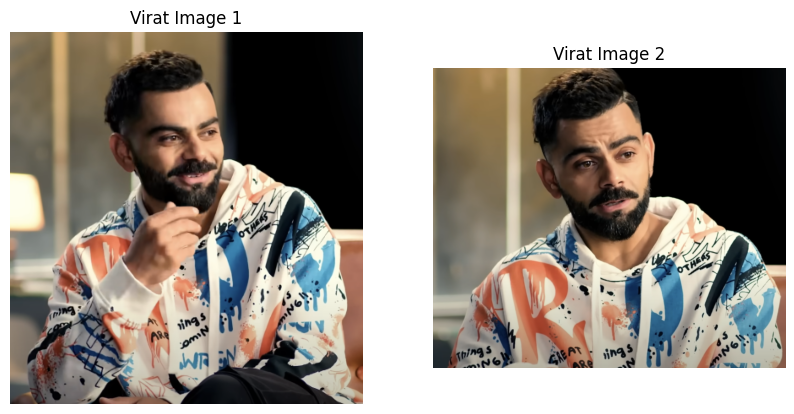

In [42]:
virat_a = cv2.imread('../../images/reconstruction/virat_1.png')
virat_b = cv2.imread('../../images/reconstruction/virat_2.png')

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(cv2.cvtColor(virat_a, cv2.COLOR_BGR2RGB))
ax[0].set_title('Virat Image 1')
ax[0].axis('off')

ax[1].imshow(cv2.cvtColor(virat_b, cv2.COLOR_BGR2RGB))
ax[1].set_title('Virat Image 2')
ax[1].axis('off')

plt.show()



##### Compute NNF of the two images (source is Image A and target is Image B) using PatchMatch algorithm and use the NNF of Image A and Image B to reconstruct Image A.

In [43]:
recon_virat_a, _, _ = reconstruct_img(virat_a, virat_b)

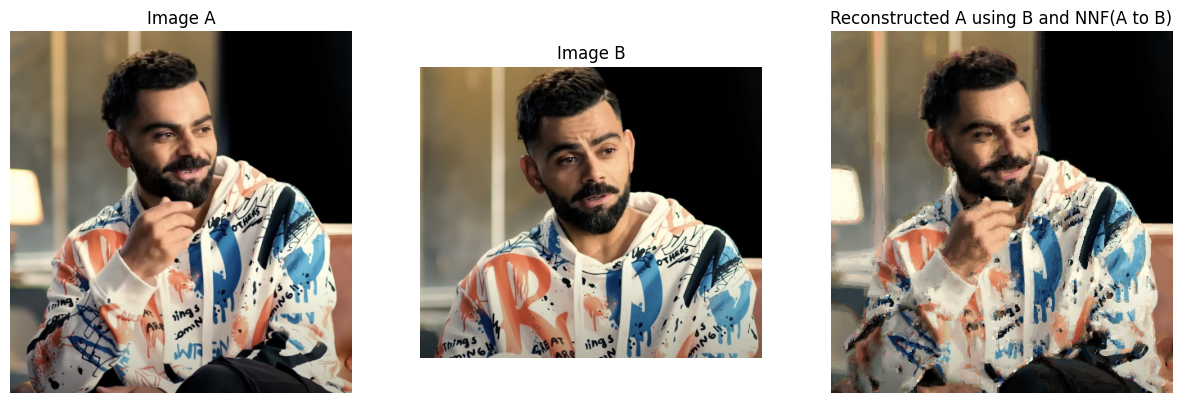

In [44]:
plot_reconstructed_images(virat_a, virat_b, recon_virat_a)

In [45]:
recon_virat_a_avg, nnf_virat, nnf_dist_virat = reconstruct_img_average(virat_a, virat_b)

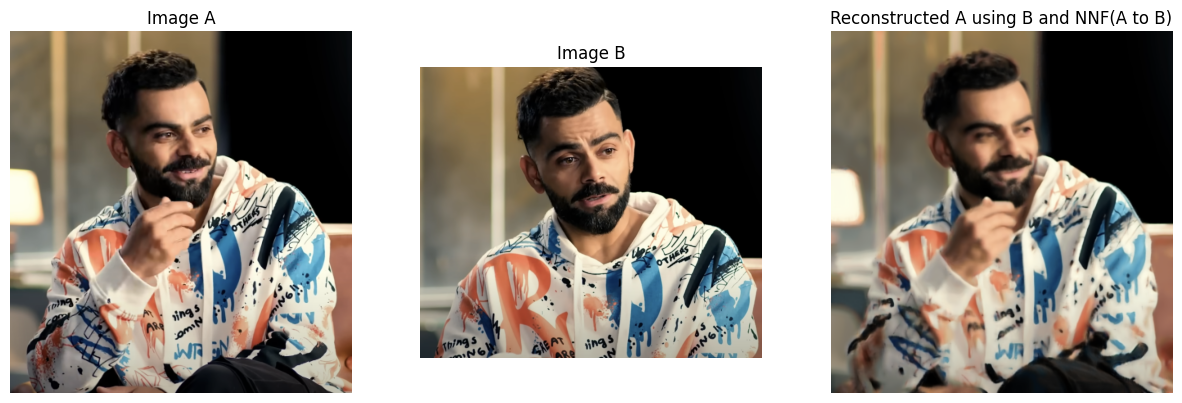

In [46]:
plot_reconstructed_images(virat_a, virat_b, recon_virat_a_avg)

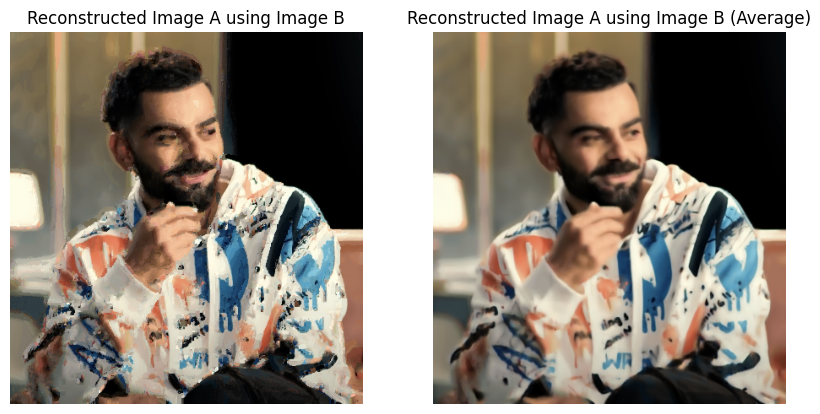

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(cv2.cvtColor(recon_virat_a, cv2.COLOR_BGR2RGB))
ax[0].set_title('Reconstructed Image A using Image B')
ax[0].axis('off')

ax[1].imshow(cv2.cvtColor(recon_virat_a_avg, cv2.COLOR_BGR2RGB))
ax[1].set_title('Reconstructed Image A using Image B (Average)')
ax[1].axis('off')

plt.show()

In [ ]:

psnr = calculate_psnr(virat_a, recon_virat_a_avg)
ssim = calculate_ssim(virat_a, recon_virat_a_avg)
mse = calculate_mse(virat_a, recon_virat_a_avg)

print(f"PSNR: {psnr:.2f} dB")
print(f"SSIM: {ssim:.4f}")
print(f"MSE: {mse:.2f}")

PSNR: 26.65 dB
SSIM: 0.9131
MSE: 140.60


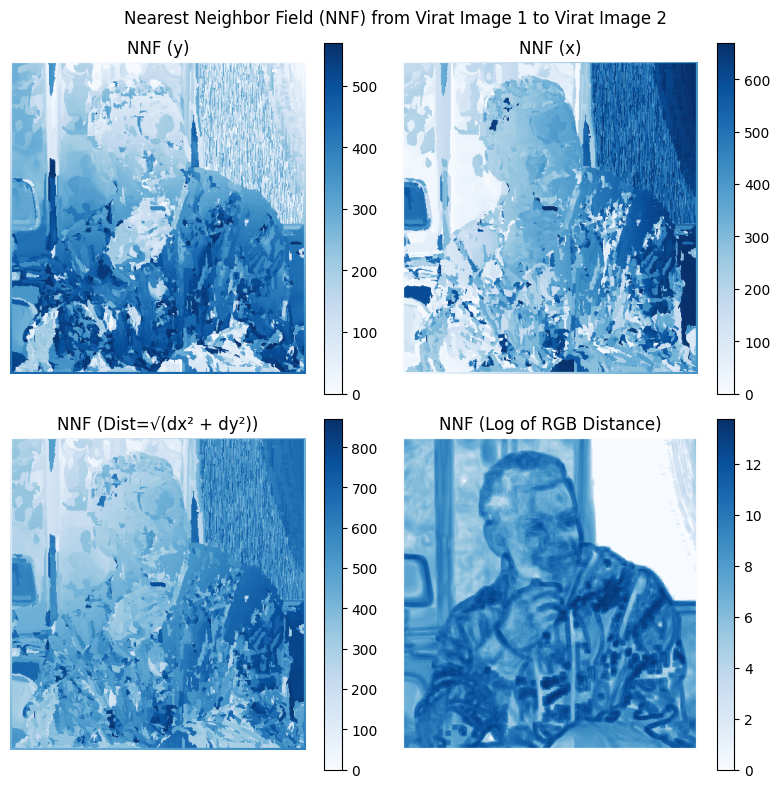

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(8, 8))
ax = ax.ravel()
plt.suptitle('Nearest Neighbor Field (NNF) from Virat Image 1 to Virat Image 2')

cmap = 'Blues'

im0 = ax[0].imshow(nnf_virat[:, :, 0], cmap=cmap)
ax[0].set_title('NNF (y)')
ax[0].axis('off')
plt.colorbar(im0, ax=ax[0])

im1 = ax[1].imshow(nnf_virat[:, :, 1], cmap=cmap)
ax[1].set_title('NNF (x)')
ax[1].axis('off')
plt.colorbar(im1, ax=ax[1])

im2 = ax[2].imshow(np.sqrt(nnf_virat[:, :, 1] **2 + nnf_virat[:, :, 0] ** 2), cmap=cmap)
ax[2].set_title('NNF (Dist=√(dx² + dy²))')
ax[2].axis('off')
plt.colorbar(im2, ax=ax[2])

im3 = ax[3].imshow(np.log(nnf_dist_virat + 1), cmap=cmap)
ax[3].set_title('NNF (Log of RGB Distance)')
ax[3].axis('off')
plt.colorbar(im3, ax=ax[3])

plt.tight_layout()
plt.show()

### 1. Artistic Style Transfer



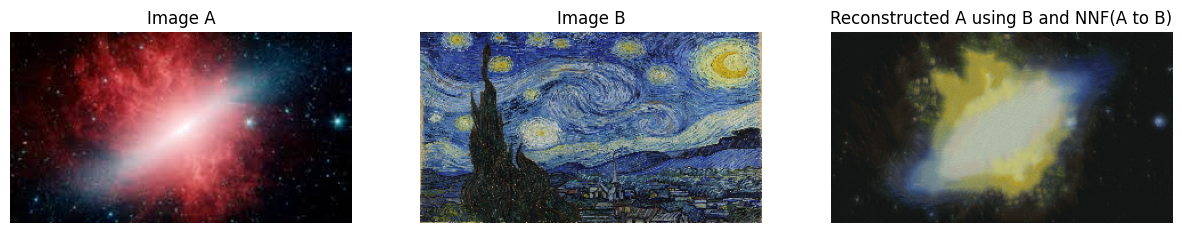

In [ ]:
style_source = cv2.imread('../images/style_source.jpg')
style_target = cv2.imread('../images/style_target.jpg')

style_source = cv2.resize(style_source, (style_target.shape[1], style_target.shape[0]))

recon_style, _, _ = reconstruct_img_average(style_target, style_source, patch_w=7, pm_iters=5)

plot_reconstructed_images(style_target, style_source, recon_style)

### 2. Texture Swapping


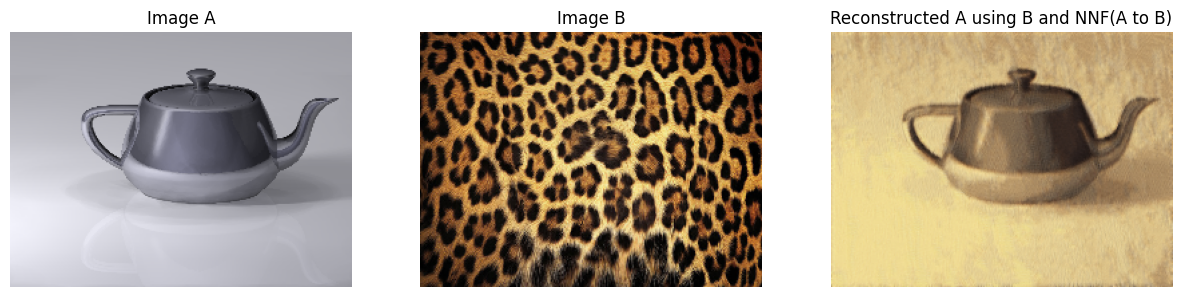

In [ ]:
texture_source = cv2.imread('../images/texture_source.jpg')
texture_target = cv2.imread('../images/texture_target.png')

new_width = 256
aspect_ratio = texture_target.shape[0] / texture_target.shape[1]
new_height = int(new_width * aspect_ratio)
texture_target = cv2.resize(texture_target, (new_width, new_height))

texture_source = cv2.resize(texture_source, (texture_target.shape[1], texture_target.shape[0]))

recon_texture, _, _ = reconstruct_img_average(texture_target, texture_source, patch_w=5, pm_iters=5)

plot_reconstructed_images(texture_target, texture_source, recon_texture)

### 3. Creative Combination


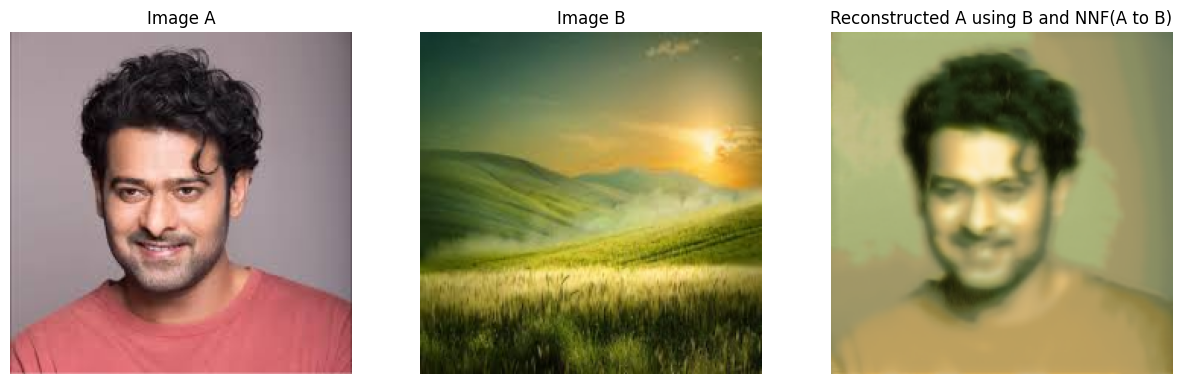

In [ ]:
creative_source = cv2.imread('../images/creative_source.jpg')
creative_target = cv2.imread('../images/creative_target.jpg')

creative_source = cv2.resize(creative_source, (creative_target.shape[1], creative_target.shape[0]))

recon_creative, nnf_creative, nnf_dist_creative = reconstruct_img_average(creative_target, creative_source, patch_w=7, pm_iters=5)

plot_reconstructed_images(creative_target, creative_source, recon_creative)

In [ ]:
psnr_creative = metrics.calculate_psnr(creative_target, recon_creative)
ssim_creative = metrics.calculate_ssim(creative_target, recon_creative)
mse_creative = metrics.calculate_mse(creative_target, recon_creative)

print(f"PSNR: {psnr_creative:.2f} dB")
print(f"SSIM: {ssim_creative:.4f}")
print(f"MSE: {mse_creative:.2f}")

PSNR: 19.27 dB
SSIM: 0.8446
MSE: 768.62
